In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
%matplotlib inline

# define the function which plots a solid parallel epiped by giving it the corner points;
# note that the array of points needs to be in a specific order such that this function works properly

In [2]:
def plot_octahedron (corners, alph):
   
    edge1 = [[corners[7], corners[3], corners[1], corners[5]]]
    face1 = Poly3DCollection(edge1, linewidths=1, edgecolors='k', alpha=alph, facecolor='lightblue')

    edge2 = [[corners[4], corners[5], corners[7], corners[6]]]
    face2 = Poly3DCollection(edge2, linewidths=1, edgecolors='k', alpha=alph, facecolor='skyblue')

    edge3 = [[corners[0], corners[1], corners[5], corners[4]]]
    face3 = Poly3DCollection(edge3, linewidths=1, edgecolors='k', alpha=alph, facecolor='lightskyblue')

    ax.add_collection3d(face1)
    ax.add_collection3d(face2)
    ax.add_collection3d(face3)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(corners[:,0], corners[:,1], corners[:,2], s=0)

    # Plot a big invisible cube around the actual data so that the aspect ratio of the actual geometry is correct
    ainv = max([a, b, c])/1.8
    pointsinv = np.array([[-ainv, -ainv, -ainv], [-ainv, -ainv, ainv], [-ainv, ainv, -ainv], [-ainv, ainv, ainv],
    [ainv, -ainv, -ainv], [ainv, -ainv, ainv], [ainv, ainv, -ainv], [ainv, ainv, ainv]])
    ax.scatter(pointsinv[:,0], pointsinv[:,1], pointsinv[:,2], s=0)

    ax.axis('off')

# some general constants about the geometry

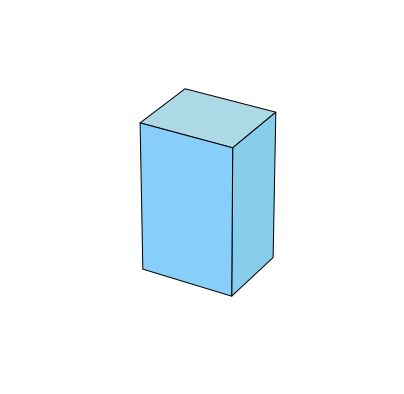

In [4]:
# unit cell parameters
a = 3
b = 2.5
c = 5

# this is an array which gives the screenshots of the strained
# geometry which will make up the gif
scale = np.cos(np.linspace(0, 2*np.pi, 15))

# amount of strain
epsilon = 0.2

# corners of the unperturbed geometry
corners_unperturbed = np.array([[-a/2, -b/2, -c/2], [-a/2, -b/2, c/2], [-a/2, b/2, -c/2], [-a/2, b/2, c/2], 
[a/2, -b/2, -c/2], [a/2, -b/2, c/2], [a/2, b/2, -c/2], [a/2, b/2, c/2]])

# plot the unperturbed geometry
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

#plot_octahedron(corners_unperturbed, 1)


# A1g,2 $\qquad\sim x^2 + y^2$

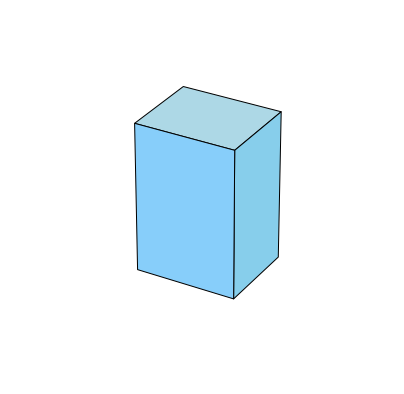

In [11]:
def A1g1 (epsilon, position):
    return epsilon * (position[0]**2 + position[1]**2)
def A1g1gradient (epsilon, position):
    return epsilon * np.array([position[0], position[1], 0])


change = np.array([A1g1gradient(epsilon, corners_unperturbed[i]) for i in np.arange(len(corners_unperturbed))])
A1g1_ch = np.array([corners_unperturbed + i * change for i in scale])


# actually produce the plot and animation
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

plot_octahedron(A1g1_ch[0], 1)


def animate(i):
    ax.cla()
    plot_octahedron(A1g1_ch[i], 1)


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('A1g1.gif', writer='imagemagick', dpi=100)


# A1g,2 $\qquad\sim x^2 - y^2$

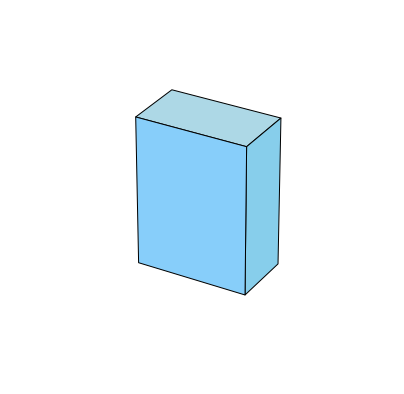

In [6]:
def A1g2 (epsilon, position):
    return epsilon * (position[0]**2 - position[1]**2)
def A1g2gradient (epsilon, position):
    return epsilon * np.array([position[0], -position[1], 0]) 


change = np.array([A1g2gradient(epsilon, corners_unperturbed[i]) for i in np.arange(len(corners_unperturbed))])
A1g2_ch = np.array([corners_unperturbed + i * change for i in scale])


# actually produce the plot and animation
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

plot_octahedron(A1g2_ch[0], 1)


def animate(i):
    ax.cla()
    plot_octahedron(A1g2_ch[i], 1)


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('A1g2.gif', writer='imagemagick', dpi=100)

# A1g,3 $\qquad\sim z^2$

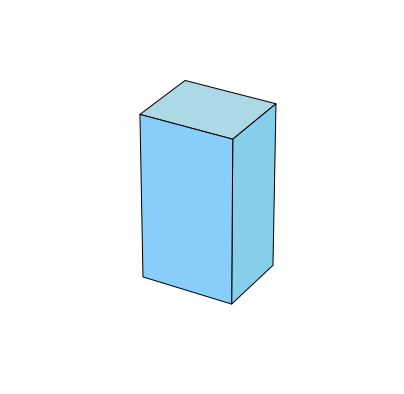

In [7]:
def A1g3 (epsilon, position):
    return epsilon * position[1]**2
def A1g3gradient (epsilon, position):
    return epsilon * np.array([0, 0, position[2]])


change = np.array([A1g3gradient(epsilon, corners_unperturbed[i]) for i in np.arange(len(corners_unperturbed))])
A1g3_ch = np.array([corners_unperturbed + i * change for i in scale])


# actually produce the plot and animation
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

plot_octahedron(A1g3_ch[0], 1)


def animate(i):
    ax.cla()
    plot_octahedron(A1g3_ch[i], 1)


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('A1g3.gif', writer='imagemagick', dpi=100)

# B1g $\qquad\sim xy$

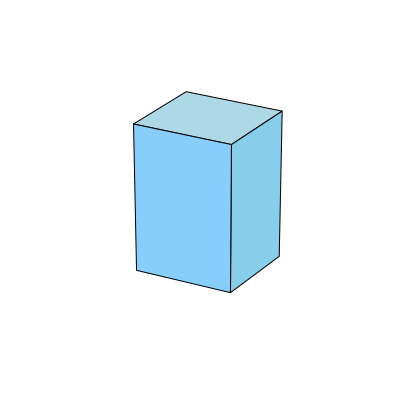

In [8]:
def B1g (epsilon, position):
    return epsilon * position[0] * position[1]
def B1ggradient (epsilon, position):
    return epsilon * np.array([position[1], position[0], 0])


# amount the geometry will be strained
epsilon = .1

change = np.array([B1ggradient(epsilon, corners_unperturbed[i]) for i in np.arange(len(corners_unperturbed))])
B1g_ch = np.array([corners_unperturbed + i * change for i in scale])


# actually produce the plot and animation
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

plot_octahedron(B1g_ch[0], 1)


def animate(i):
    ax.cla()
    plot_octahedron(B1g_ch[i], 1)


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('B1g.gif', writer='imagemagick', dpi=100)

# B2g $\qquad\sim xz$

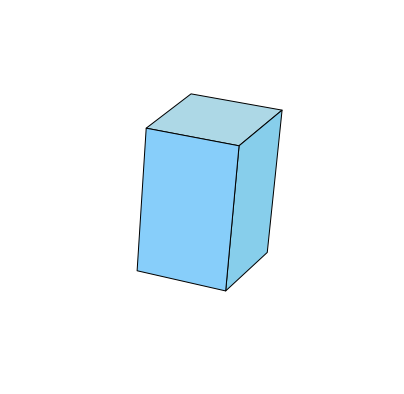

In [9]:
def B2g (epsilon, position):
    return epsilon * position[0] * position[2]
def B2ggradient (epsilon, position):
    return epsilon * np.array([position[2], 0, position[0]])


# amount the geometry will be strained
epsilon = .08

change = np.array([B2ggradient(epsilon, corners_unperturbed[i]) for i in np.arange(len(corners_unperturbed))])
B2g_ch = np.array([corners_unperturbed + i * change for i in scale])


# actually produce the plot and animation
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

plot_octahedron(B2g_ch[0], 1)


def animate(i):
    ax.cla()
    plot_octahedron(B2g_ch[i], 1)


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('B2g.gif', writer='imagemagick', dpi=100)

# B3g $\qquad\sim yz$

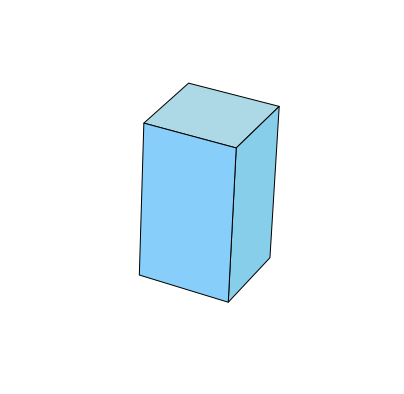

In [10]:
def B3g (epsilon, position):
    return epsilon * position[1] * position[2]
def B3ggradient (epsilon, position):
    return epsilon * np.array([0, position[2], position[1]])


# amount the geometry will be strained
epsilon = .08

change = np.array([B3ggradient(epsilon, corners_unperturbed[i]) for i in np.arange(len(corners_unperturbed))])
B3g_ch = np.array([corners_unperturbed + i * change for i in scale])


# actually produce the plot and animation
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

#plot_octahedron(corners_unperturbed, .2)
plot_octahedron(B3g_ch[0], 1)


def animate(i):
    ax.cla()
    #plot_octahedron(corners_unperturbed, .2)
    plot_octahedron(B3g_ch[i], 1)


    
anim = FuncAnimation(fig, animate, frames=len(scale)-1, interval=10, repeat=True)

plt.show()

#anim.save('B3g.gif', writer='imagemagick', dpi=100)